<a href="https://colab.research.google.com/github/AstxMargaryan/Colab_works/blob/main/melb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor


**Loading data to pandas DataFrame**

In [2]:
df = pd.read_csv("melb_data.csv")


**First look at Data**

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.duplicated().sum()

np.int64(0)

**First look at missing values**

In [7]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


**Lets watch missing values with percentage**

In [8]:
s = df.isnull().sum()
missings_percentage = s/df.shape[0]*100
missings_percentage
# df.isna().mean()*100

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


<Axes: xlabel='Price', ylabel='Count'>

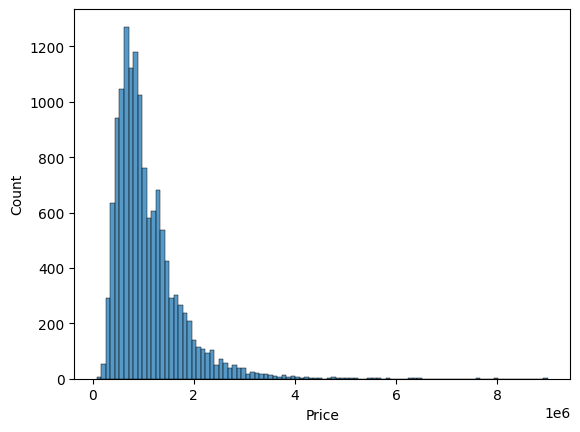

In [9]:
sns.histplot(df["Price"],bins=100)

<Axes: ylabel='Price'>

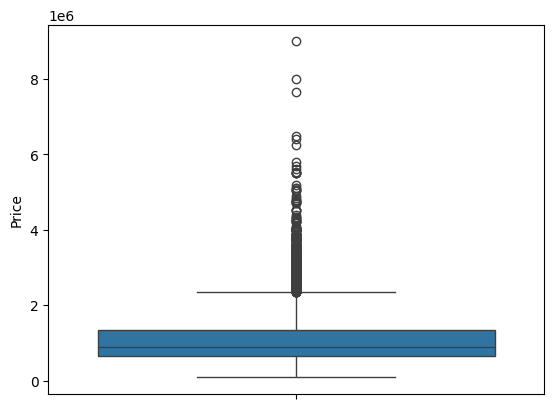

In [10]:
sns.boxplot(df["Price"])

<Axes: >

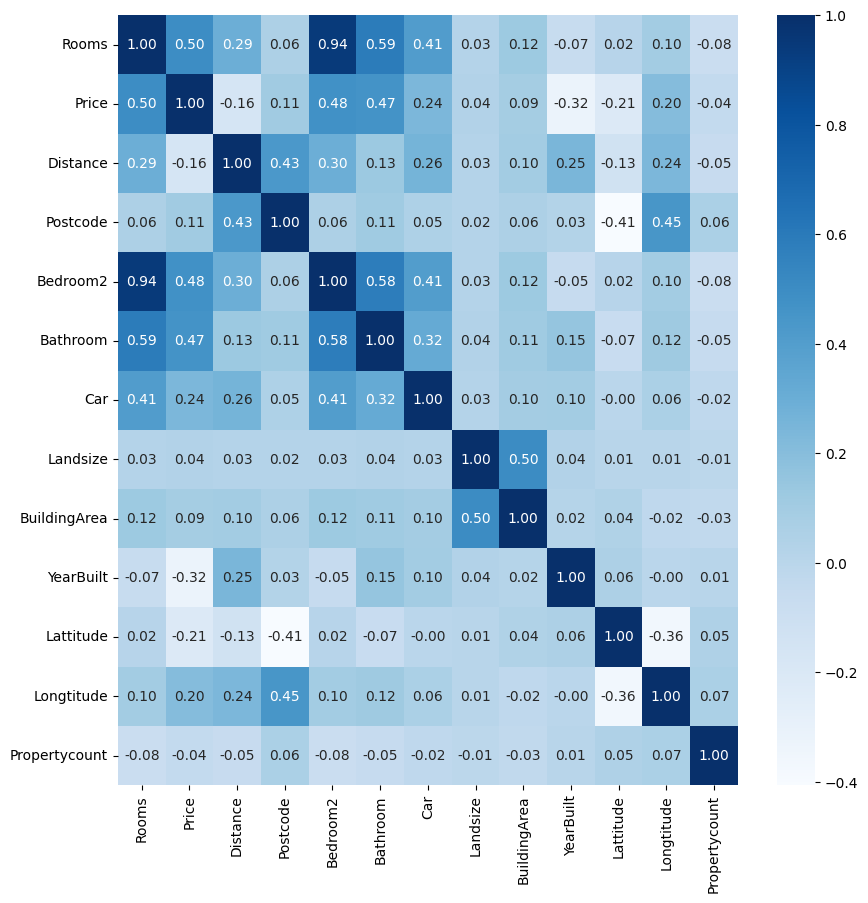

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),cmap="Blues",annot=True,fmt =".2f")

At first when we watch to Car we see that it has few missing values(about 0.45%) so it can be good idea to fill them with median or mean. Lets decide which to choose from these twos

<Axes: xlabel='Car', ylabel='Count'>

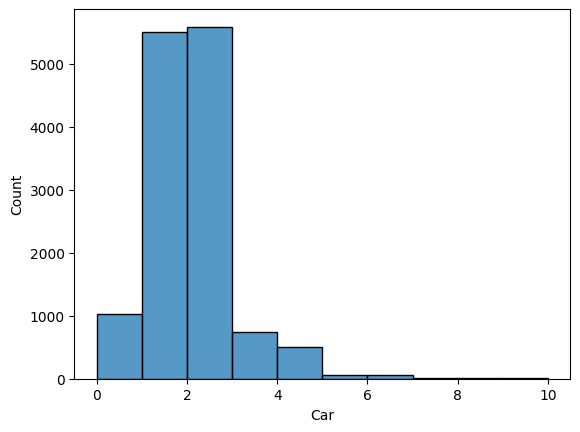

In [12]:
sns.histplot(df["Car"],bins=10)

We can see that main distribution of the data are in the bins (0-4) so in this case using mean for missing value imputation can be not good idea , so i will use imputation with median

In [13]:
df["Car"] = df["Car"].fillna(df["Car"].median())
df["Car"].isnull().sum()

np.int64(0)

If we watch to the YearBuilt we will see that it has 39.58% of missing values , and dont have good relationship with important features for predicting price.

But it has its negative impact on price that is -0.32 coefficent and normal coefficent with Distance , weak relationship with Bathroom(these can help us to fill missing values in the future).

For keeping information, and also it is important to give attention to the negative impact on price, i decide to fill it with columns that are related to YearBuilt(Dont fill with median or mean because there are much missing values)

In [14]:
df['YearBuilt'] = pd.to_numeric(df['YearBuilt'], errors='coerce')
df['YearBuilt'] = df.groupby(['Distance', 'Bathroom'])['YearBuilt'].transform(lambda x: x.fillna(x.median()))
df['YearBuilt'].isnull().sum()

np.int64(99)

There are still missing values because the grouping don't give the all median values to impute so we can impute remaining part with median of the YearBuild

In [15]:
df['YearBuilt'] = pd.to_numeric(df['YearBuilt'], errors='coerce')
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df['YearBuilt'].isnull().sum()

np.int64(0)

In [16]:
df["CouncilArea"]=df["CouncilArea"].fillna(df["CouncilArea"].mode()[0])
df["CouncilArea"].isnull().sum()

np.int64(0)

In [17]:
x= df.isnull().sum()
missings_percentage=x/df.shape[0]*100
missings_percentage

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


Based on the correaltion matrix we will see that BuildingArea hasn't important impact on price and hasn't moderate relationships with other important features.Also wee need to consider the fact that it has big amount of missing values more than 47%.
But if we will wath to this from other side we can say that BuildingArea has important impact on price in real-life logic and will be good to fill it.
Because of big amount of missing values mean-median imputation will not work like required, so i decide to fill it with KNN imputer based on the columns that have normal correlation with BuildingArea

In [18]:
imputation_cols = ['BuildingArea', 'Landsize', 'Rooms']
df_impute = df[imputation_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_impute)

imputer = KNNImputer(n_neighbors=5)

df_imputed_scaled = imputer.fit_transform(df_scaled)

df[imputation_cols] = scaler.inverse_transform(df_imputed_scaled)

In [19]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


As model we will use Decision tree , RandomForest and Catboost.
RandomForest and Decision tree need the data to be encoded , but Catboost handle categorical data automatically with good techniques.
Now we need to encode our data's categorical columns that we will use in the future for our model, and save the version of the data with categorical features to try Catboost also

lets understand the count of unique values in our categorical features to decide which encoding technique to use

In [20]:
categorical_columns = df.select_dtypes(include=["object"]).columns
for feature in df[categorical_columns]:
  print(f"{feature}:{df[feature].nunique()}")

Suburb:314
Address:13378
Type:3
Method:5
SellerG:268
Date:58
CouncilArea:33
Regionname:8


For encoding will be good approach to do One-Hot Encode with the columns that have small number of uniques columns.
And do LabelEncode with the columns that have comparely big number of unique columns

In [21]:
df_encoded = df.copy()

In [22]:
threshold = 10
for feature in categorical_columns:
    unique_count = df[feature].nunique()
    if unique_count < threshold:
        df_encoded = pd.get_dummies(df_encoded, columns=[feature], drop_first=True)
    else:
        le = LabelEncoder()
        df_encoded[feature] = le.fit_transform(df[feature])

In [23]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 13580 non-null  int64  
 1   Address                                13580 non-null  int64  
 2   Rooms                                  13580 non-null  float64
 3   Price                                  13580 non-null  float64
 4   SellerG                                13580 non-null  int64  
 5   Date                                   13580 non-null  int64  
 6   Distance                               13580 non-null  float64
 7   Postcode                               13580 non-null  float64
 8   Bedroom2                               13580 non-null  float64
 9   Bathroom                               13580 non-null  float64
 10  Car                                    13580 non-null  float64
 11  La

So, now we have two version of our data:
1.Encoded version : it is for models such as Decision Tree, RandomForest
2.Clean data before encoding: it is for CatBoost(it has good techniques to handle categorical data)

In [24]:
X_encod = df_encoded.drop('Price', axis = 1)
y_encod = df_encoded['Price']
X_encod

,Suburb,Address,Rooms,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,12794,2.0,23,45,2.5,3067.0,2.0,1.0,1.0,...,False,False,False,False,True,False,False,False,False,False
1,0,5943,2.0,23,47,2.5,3067.0,2.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,0,9814,3.0,23,48,2.5,3067.0,3.0,2.0,0.0,...,False,True,False,False,True,False,False,False,False,False
3,0,9004,3.0,23,48,2.5,3067.0,3.0,2.0,1.0,...,False,False,False,False,True,False,False,False,False,False
4,0,10589,4.0,155,49,2.5,3067.0,3.0,1.0,2.0,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302,1991,4.0,16,33,16.7,3150.0,4.0,2.0,2.0,...,False,False,False,False,False,False,True,False,False,False
13576,305,12234,3.0,251,33,6.8,3016.0,3.0,2.0,2.0,...,False,True,False,False,False,False,False,False,True,False
13577,305,12745,3.0,194,33,6.8,3016.0,3.0,2.0,4.0,...,False,False,False,False,False,False,False,False,True,False
13578,305,13311,4.0,222,33,6.8,3016.0,4.0,1.0,5.0,...,False,False,False,False,False,False,False,False,True,False


In [25]:
y_encod

,Price
0,1480000.0
1,1035000.0
2,1465000.0
3,850000.0
4,1600000.0
...,...
13575,1245000.0
13576,1031000.0
13577,1170000.0
13578,2500000.0


In [26]:
X_train_encod, X_test_encod, y_train_encod, y_test_encod = train_test_split(X_encod, y_encod, test_size = 0.2, random_state = 100)

In [27]:
t = DecisionTreeRegressor(random_state = 20)
param_grid = {
    'max_depth': [3, 5, 8, 10, 12,],
    'min_samples_split': [2,5, 7,9,13],
    'min_samples_leaf': [1,3, 5, 7,12,]}

grid_search = GridSearchCV(estimator = t, param_grid = param_grid,
                           scoring = 'neg_mean_squared_error', cv=5, n_jobs=-1, )

grid_search.fit(X_train_encod, y_train_encod)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 2}


In [54]:
dt_model = DecisionTreeRegressor(max_depth = 12, min_samples_leaf = 12, min_samples_split = 2)
dt_model.fit(X_train_encod, y_train_encod)
y_predict_encod = dt_model.predict(X_test_encod)


In [29]:
rmse = root_mean_squared_error(y_test_encod, y_predict_encod)
r2_encod = r2_score(y_test_encod, y_predict_encod)
print(f'RMSE value for  decision tree is: {rmse:.2f}')
print(f'r2 score for decision tree is: {r2_encod:.2f}')

RMSE value for  decision tree is: 358163.87
r2 score for decision tree is: 0.69


In [31]:
t1 = RandomForestRegressor(random_state=42, n_jobs=-1)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}


search = RandomizedSearchCV(t1, param_dist, n_iter=20, cv=3, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

search.fit(X_train_encod, y_train_encod)
print("Best params:", search.best_params_)

Best params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}


In [32]:
rf = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth =  40)
rf.fit(X_train_encod, y_train_encod)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=300)

In [33]:
y_predict_rf = rf.predict(X_test_encod)
rmse_rf = root_mean_squared_error(y_test_encod, y_predict_rf)
r2_rf = r2_score(y_test_encod, y_predict_rf)
print(f'RMSE value for  decision tree is: {rmse_rf:.2f}')
print(f'r2 score for decision tree is: {r2_rf:.2f}')

RMSE value for  decision tree is: 288894.54
r2 score for decision tree is: 0.80


In [34]:
y = df['Price']
x = df.drop('Price', axis = 1)
x

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2.0,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,112.0,1910.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2.0,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3.0,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3.0,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,126.8,1959.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4.0,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4.0,h,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,188.8,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3.0,h,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3.0,h,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,169.8,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4.0,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


In [35]:
y

,Price
0,1480000.0
1,1035000.0
2,1465000.0
3,850000.0
4,1600000.0
...,...
13575,1245000.0
13576,1031000.0
13577,1170000.0
13578,2500000.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=100)

In [55]:
cat = CatBoostRegressor(verbose=0,random_seed=44)


param_dist = {
    'depth': [4, 6, 8, 10], 'learning_rate': [0.01, 0.05, 0.1], 'iterations': [300, 500, 800, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9], 'bagging_temperature': [0, 0.5, 1, 2]}

cat_features = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname' ]


search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=16,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42)


search.fit(X_train, y_train, cat_features=cat_features)

print("Best params:", search.best_params_)

Best params: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 6, 'bagging_temperature': 0.5}


In [46]:
final_model = CatBoostRegressor(
    depth=6,
    learning_rate=0.1,
    iterations=1000,
    l2_leaf_reg=3,
    cat_features=cat_features,
    random_seed=42,
    verbose=200)

final_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

y_pred = final_model.predict(X_test)

0:	learn: 601958.0970521	test: 611584.4655373	best: 611584.4655373 (0)	total: 76.4ms	remaining: 1m 16s
200:	learn: 241167.5845041	test: 266405.2223483	best: 266405.2223483 (200)	total: 4.97s	remaining: 19.8s
400:	learn: 212592.6407390	test: 256898.3055094	best: 256898.3055094 (400)	total: 11.3s	remaining: 16.8s
600:	learn: 192579.2067663	test: 252894.9273405	best: 252894.9273405 (600)	total: 16.4s	remaining: 10.9s
800:	learn: 177605.5496194	test: 250972.2703556	best: 250925.3045803 (795)	total: 22.1s	remaining: 5.48s
999:	learn: 166299.9076321	test: 250711.4956705	best: 250541.7048403 (932)	total: 28.4s	remaining: 0us

bestTest = 250541.7048
bestIteration = 932

Shrink model to first 933 iterations.


In [48]:
y_predict_cb = final_model.predict(X_test)
rmse_cb = root_mean_squared_error(y_test, y_predict_cb)
r2_cb = r2_score(y_test, y_predict_cb)
print(f'RMSE value for  CatBoost: {rmse_cb:.2f}')
print(f'r2 score for Catboost: {r2_cb:.2f}')

RMSE value for  CatBoost: 250541.70
r2 score for Catboost: 0.85
